### Importamos las librerias

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import setuptools.dist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2025-02-11 13:12:32.542323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 13:12:32.582241: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 13:12:32.583631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-11 13:12:33.424076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/car_price_prediction.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
# Filtrar solo las columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Obtener los valores únicos de cada columna no numérica
for column in non_numeric_columns:
    print(f"Valores únicos en la columna '{column}':")
    print(non_numeric_columns[column].unique())
    print("\n")  # Salto de línea para mayor claridad

Valores únicos en la columna 'Levy':
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '114

In [7]:
df['Levy'] = df['Levy'].str.replace("-", "0").astype(float)
df['Mileage'] = df['Mileage'].str.replace(" km", "").astype(float)
df['Doors'] = df['Doors'].replace({
    '04-May': 4,
    '02-Mar': 2,
    '>5': 5
}).astype(int)

df['Leather interior'] = df['Leather interior'].replace({
    'Yes': 1,
    'No': 0
}).astype(int)

import datetime
now_date = datetime.datetime.now()
df['Age'] = now_date.year - df['Prod. year']
df = df.drop(columns=['ID','Prod. year'], axis=1)
# df = df.drop(, axis=1)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  int64  
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  float64
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  int64  
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
 16  Age               19237 non-null  int64 

In [8]:
# Filtrar solo las columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Obtener los valores únicos de cada columna no numérica
for column in non_numeric_columns:
    print(f"Valores únicos en la columna '{column}':")
    print(non_numeric_columns[column].unique())
    print("\n") 

Valores únicos en la columna 'Manufacturer':
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


Valores únicos en la columna 'Model':
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']


Valores únicos en la columna 'Category':
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


Valores únicos en la columna 'Fuel type':
['Hybrid' 'Petrol' 'Di

In [9]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del LabelEncoder
le = LabelEncoder()

# Seleccionar las columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Aplicar el LabelEncoder a cada columna no numérica
for column in non_numeric_columns:
    df[column] = le.fit_transform(df[column])

# Verificar los cambios
print(df.head())
print(df.info())

   Price    Levy  Manufacturer  Model  Category  Leather interior  Fuel type  \
0  13328  1399.0            32   1242         4                 1          2   
1  16621  1018.0             8    658         4                 0          5   
2   8467     0.0            21    684         3                 0          5   
3   3607   862.0            16    661         4                 1          2   
4  11726   446.0            21    684         3                 1          5   

   Engine volume   Mileage  Cylinders  Gear box type  Drive wheels  Doors  \
0             63  186005.0        6.0              0             0      4   
1             56  192000.0        6.0              2             0      4   
2             22  200000.0        4.0              3             1      4   
3             46  168966.0        4.0              0             0      4   
4             22   91901.0        4.0              0             1      4   

   Wheel  Color  Airbags  Age  
0      0     12       12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  int64  
 3   Model             19237 non-null  int64  
 4   Category          19237 non-null  int64  
 5   Leather interior  19237 non-null  int64  
 6   Fuel type         19237 non-null  int64  
 7   Engine volume     19237 non-null  int64  
 8   Mileage           19237 non-null  float64
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  int64  
 11  Drive wheels      19237 non-null  int64  
 12  Doors             19237 non-null  int64  
 13  Wheel             19237 non-null  int64  
 14  Color             19237 non-null  int64  
 15  Airbags           19237 non-null  int64  
 16  Age               19237 non-null  int64

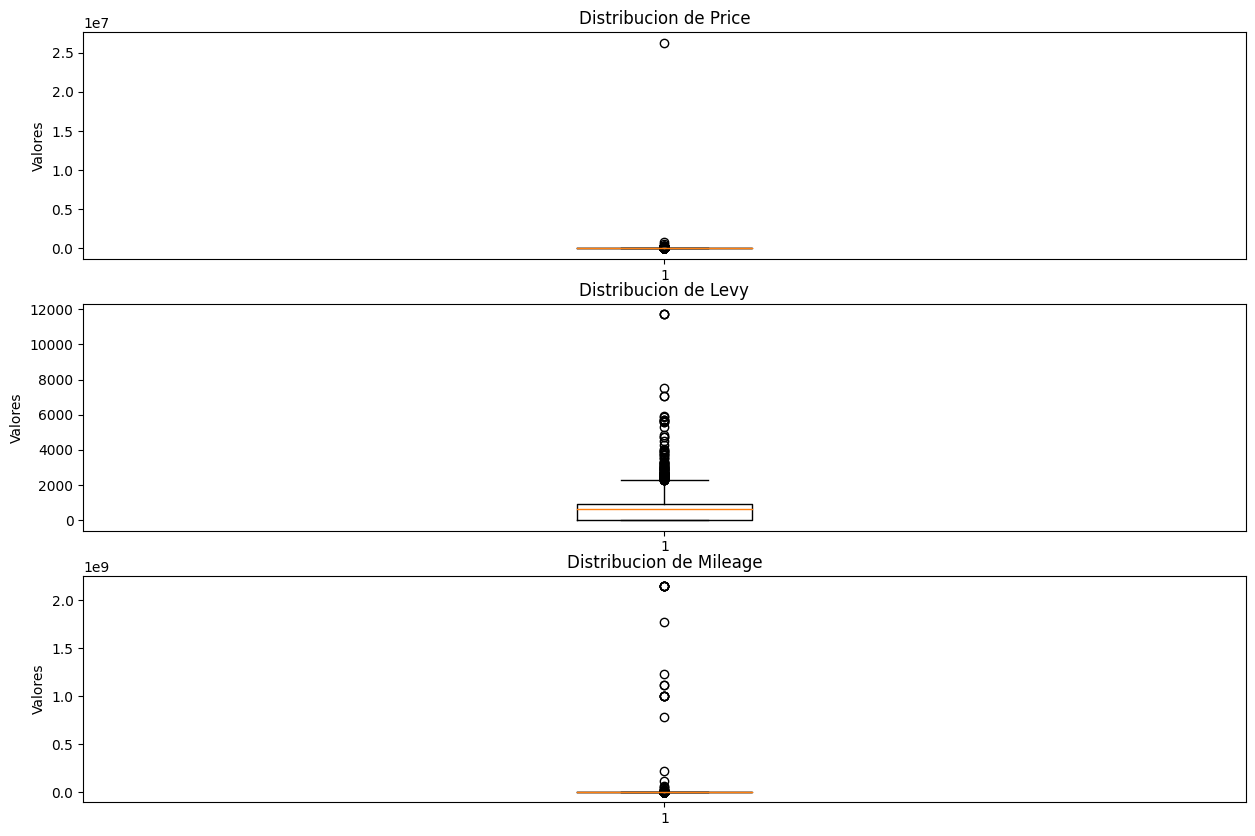

In [10]:
columns_outliers = ['Price', 'Levy', 'Mileage']
data_outliers = df[columns_outliers]
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(data_outliers):
    axes[i].boxplot(data_outliers[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(data_outliers), len(axes)):
    axes[j].axis('off')

plt.show()

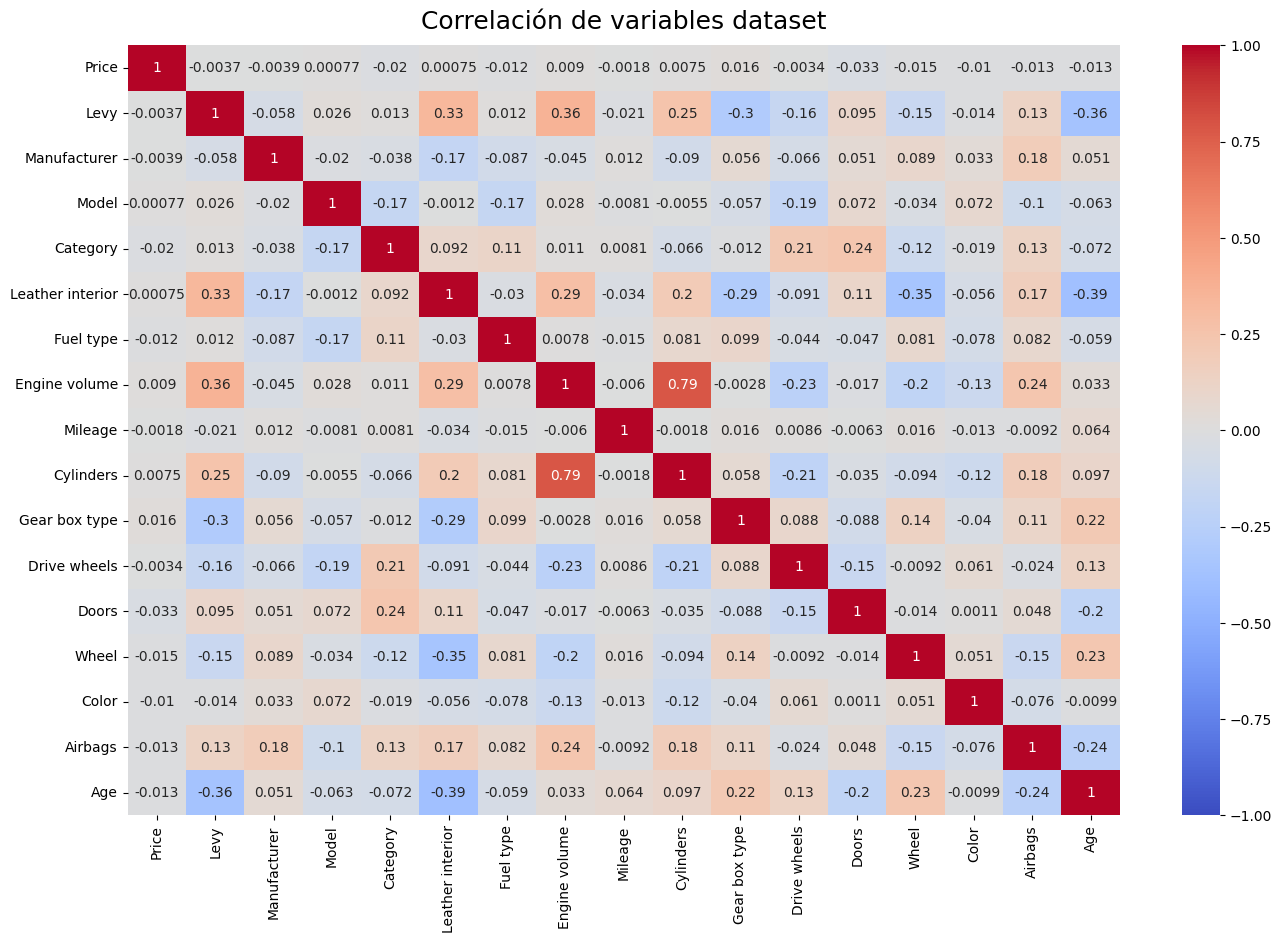

In [11]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlación de variables dataset', fontdict={'fontsize': 18}, pad=12)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Separamos caracteristicas y variable objetivo
X = df.drop(columns=['Price'])
y = df['Price']

# Crear una instancia del MinMaxScaler
scaler = StandardScaler()
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar manualmente las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.layers import Dense, Dropout
# Creación del modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Capa de salida para regresión
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumen de la arquitectura del modelo
print("\nResumen del modelo:")
model.summary()


Resumen del modelo:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None,

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir el EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Métrica a monitorear (puede ser 'val_accuracy', 'val_loss', etc.)
    patience=5,             # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True # Restaura los pesos del modelo con la mejor métrica de validación
)


In [15]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
385/385 [==============================] - 2s 3ms/step - loss: 56949428224.0000 - mae: 19403.3203 - val_loss: 573559680.0000 - val_mae: 16229.7910
Epoch 2/100
385/385 [==============================] - 1s 3ms/step - loss: 56864804864.0000 - mae: 17910.0078 - val_loss: 427027392.0000 - val_mae: 13573.5820
Epoch 3/100
385/385 [==============================] - 1s 2ms/step - loss: 56684101632.0000 - mae: 14955.6904 - val_loss: 281466336.0000 - val_mae: 11052.5391
Epoch 4/100
385/385 [==============================] - 1s 2ms/step - loss: 56598593536.0000 - mae: 14115.3262 - val_loss: 259146576.0000 - val_mae: 10537.7568
Epoch 5/100
385/385 [==============================] - 1s 2ms/step - loss: 56585875456.0000 - mae: 13814.7324 - val_loss: 250267232.0000 - val_mae: 10367.5469
Epoch 6/100
385/385 [==============================] - 1s 2ms/step - loss: 56589991936.0000 - mae: 13791.5293 - val_loss: 245149712.0000 - val_mae: 10282.3789
Epoch 7/100
385/385 [=========================

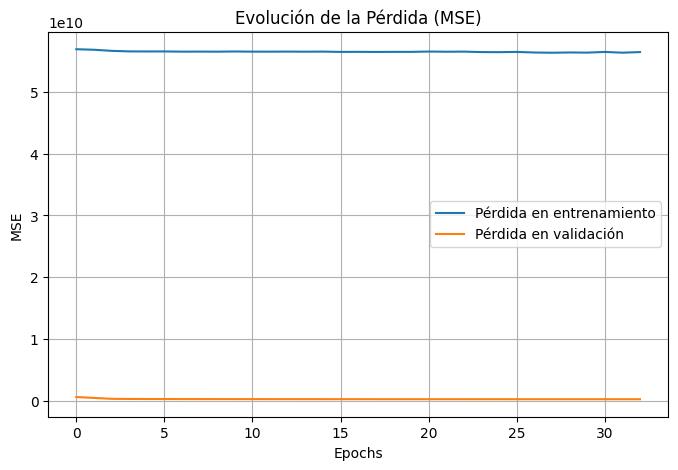

In [16]:
# 6.1 Gráfica de la pérdida (MSE)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Evolución de la Pérdida (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

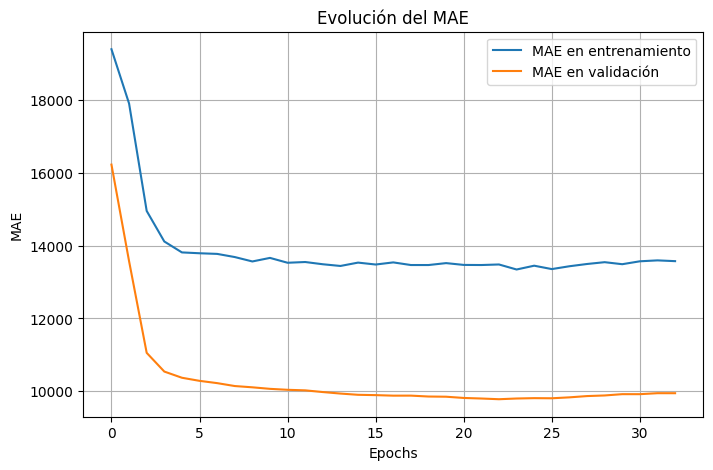

In [17]:
# 6.2 Gráfica del MAE
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='MAE en entrenamiento')
plt.plot(history.history['val_mae'], label='MAE en validación')
plt.title('Evolución del MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print("\nEvaluación en el conjunto de prueba:")
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

121/121 [==============================] - 0s 1ms/step - loss: 216945088.0000 - mae: 9828.8574

Evaluación en el conjunto de prueba:
Test Loss (MSE): 216945088.0
Test MAE: 9828.857421875


121/121 [==============================] - 0s 1ms/step
        Real      Predicho
736    27284  10600.486328
8674   10349  15545.310547
5971   40769  11353.336914
1957   38737  25037.107422
11075  42102  22519.847656
...      ...           ...
12026  12231  19319.914062
17893  15681  14107.085938
5339     314  13717.028320
11859  14069   7293.690918
9276   15681  20197.203125

[3848 rows x 2 columns]


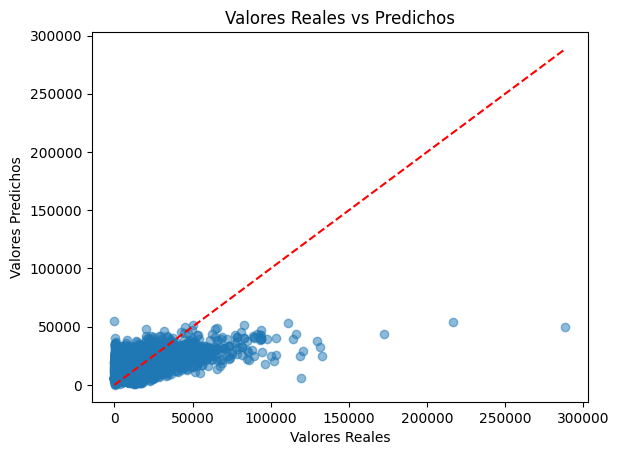

In [19]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Comparar valores reales vs predichos
results = pd.DataFrame({"Real": y_test, "Predicho": y_pred.flatten()})
print(results)


import matplotlib.pyplot as plt

# Graficar valores reales vs predichos
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Predichos")
plt.show()